**<center> <span style="color:Black;font-family:Georgian; font-size:22px;">TELECOM CUSTOMER CHURN - EXPLORATORY DATA ANALYSIS</span> </center>**

**<span style="color:Black;font-family:Georgian; font-size:20px;">1.1 Introduction</span>**
* Customer churn is a one of the biggest problem in the telecom industry. According to studies, average monthly churn rate is between 1.9% and 2.1%.
* Customers in the telecom sector have a number of service providers to pick from and can actively switch between them. In this fiercely competitive sector, the telecoms industry experiences an annual churn rate of around 22%.
* To decrease customer churn, telecom firms must identify which customers are most likely to leave. 
* The company's main priority for success is to reduce client attrition and execute an effective retention plan.
* The main objective of this project is to investigate the data and find insights/ patters in the data. 

**<span style="color:Black;font-family:Georgian; font-size:20px;">1.2 Data Preparation</span>**

* Read data with pandas
* Look at the data
* Make column name and values uniform
* Check if the data is read correctly
* Check for missing values

In [47]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
import sweetviz as sv

In [48]:
df = pd.read_csv('telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [50]:
# Making columns names and values uniform

df.columns = df.columns.str.lower()
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [51]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [52]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [53]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce')
tc.isnull().sum()

11

In [54]:
df[tc.isnull()][['customerid', 'tenure', 'monthlycharges', 'totalcharges', 'churn']]

,customerid,tenure,monthlycharges,totalcharges,churn
488,4472-lvygi,0,52.55,_,no
753,3115-czmzd,0,20.25,_,no
936,5709-lvoeq,0,80.85,_,no
1082,4367-nuyao,0,25.75,_,no
1340,1371-dwpaz,0,56.05,_,no
3331,7644-omvmy,0,19.85,_,no
3826,3213-vvolg,0,25.35,_,no
4380,2520-sgtta,0,20.00,_,no
5218,2923-arzlg,0,19.70,_,no
6670,4075-wkniu,0,73.35,_,no


***Most likely cause of missing data in total charges columns*** 
* Customers may have just started using their sevices and may be in the middle of a trial period.

In [55]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [56]:
df['seniorcitizen'].replace([0, 1], ['no', 'yes'], inplace=True)

In [57]:
df['churn'].replace(['no', 'yes'], [0, 1], inplace=True)

In [58]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,no,no,no,no,no
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [59]:
# Group tenure in bins of 12 months
labels = ["{0}_{1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenuregroup'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [60]:
df.tenuregroup = df.tenuregroup.fillna('1_12')

In [61]:
df['tenuregroup'] = df['tenuregroup'].astype(object)

In [62]:
df_encode = df.copy()

In [63]:
df_encode['gender'].replace(['female', 'male'], [0, 1], inplace=True)
df_encode['seniorcitizen'].replace(['no', 'yes'], [0, 1], inplace=True)
df_encode['partner'].replace(['yes', 'no'], [1, 0], inplace=True)
df_encode['dependents'].replace(['no', 'yes'], [0, 1], inplace=True)
df_encode['phoneservice'].replace(['no', 'yes'], [0, 1], inplace=True)
df_encode['multiplelines'].replace(['no_phone_service', 'no', 'yes'], [0, 1, 2], inplace=True)
df_encode['internetservice'].replace(['dsl', 'fiber_optic', 'no'], [2, 1, 0], inplace=True)
df_encode['onlinesecurity'].replace(['no', 'yes', 'no_internet_service'], [0, 1, 2], inplace=True)
df_encode['onlinebackup'].replace(['yes', 'no', 'no_internet_service'], [1, 0, 2], inplace=True)
df_encode['deviceprotection'].replace(['no', 'yes', 'no_internet_service'], [0, 1, 2], inplace=True)
df_encode['techsupport'].replace(['no', 'yes', 'no_internet_service'], [0, 1, 2], inplace=True)
df_encode['streamingtv'].replace(['no', 'yes', 'no_internet_service'], [0, 1, 2], inplace=True)
df_encode['streamingmovies'].replace(['no', 'yes', 'no_internet_service'], [0, 1, 2], inplace=True)
df_encode['contract'].replace(['month-to-month', 'one_year', 'two_year'], [0, 1, 2], inplace=True)
df_encode['paperlessbilling'].replace(['yes', 'no'], [1, 0], inplace=True)
df_encode['paymentmethod'].replace(['electronic_check', 'mailed_check', 'bank_transfer_(automatic)', 'credit_card_(automatic)'], [0, 1, 2, 3], inplace=True)
df_encode['tenuregroup'].replace(['1_12', '13_24', '25_36', '37_48', '49_60', '61_72'], [0, 1, 2, 3, 4, 5], inplace=True)

In [64]:
df_encode.drop(columns='customerid', inplace=True)

In [65]:
df_encode.head().T

,0,1,2,3,4
gender,0.00,1.00,1.00,1.00,0.00
seniorcitizen,0.00,0.00,0.00,0.00,0.00
partner,1.00,0.00,0.00,0.00,0.00
dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
phoneservice,0.00,1.00,1.00,0.00,1.00
multiplelines,0.00,1.00,1.00,0.00,1.00
internetservice,2.00,2.00,2.00,2.00,1.00
onlinesecurity,0.00,1.00,1.00,1.00,0.00
onlinebackup,1.00,0.00,1.00,0.00,0.00


**<span style="color:Black;font-family:Georgian; font-size:20px;">1.3 EDA</span>**

* Outlier analysis
* Numerical data analysis
* Categorical data analysis

In [66]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print('Number of unique values: ', df[col].nunique())
    print('-------------------')

customerid
['7590-vhveg' '5575-gnvde' '3668-qpybk' '7795-cfocw' '9237-hqitu']
Number of unique values:  7043
-------------------
gender
['female' 'male']
Number of unique values:  2
-------------------
seniorcitizen
['no' 'yes']
Number of unique values:  2
-------------------
partner
['yes' 'no']
Number of unique values:  2
-------------------
dependents
['no' 'yes']
Number of unique values:  2
-------------------
tenure
[ 1 34  2 45  8]
Number of unique values:  73
-------------------
phoneservice
['no' 'yes']
Number of unique values:  2
-------------------
multiplelines
['no_phone_service' 'no' 'yes']
Number of unique values:  3
-------------------
internetservice
['dsl' 'fiber_optic' 'no']
Number of unique values:  3
-------------------
onlinesecurity
['no' 'yes' 'no_internet_service']
Number of unique values:  3
-------------------
onlinebackup
['yes' 'no' 'no_internet_service']
Number of unique values:  3
-------------------
deviceprotection
['no' 'yes' 'no_internet_service']
Numb

In [67]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
    'tenuregroup',
]

In [68]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
totalcharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


***Checking for Outlier*** 

In [69]:
Q1, Q3 = np.percentile(df['totalcharges'] , [25,75])
IQR = Q3 - Q1
ul = Q3 + 1.5 * IQR
ll = Q1 - 1.5 * IQR
print(f'Total Charges: IQR is {IQR}, Upper limit is {ul}, and Lower limit is {ll}.')

Total Charges: IQR is 3388.0499999999997, Upper limit is 8868.675, and Lower limit is -4683.525.


In [70]:
for n in numerical:
    fig = px.box(df, y=n, title=n.upper())
    fig.show()

***Analysis of numerical data***

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

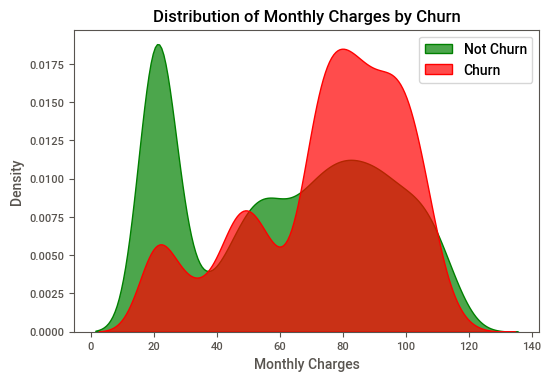

In [71]:
mtc = sns.kdeplot(df.monthlycharges[(df["churn"] == 0) ],color= 'Green', shade = True, alpha=0.7)
mtc = sns.kdeplot(df.monthlycharges[(df["churn"] == 1) ],color= 'Red', shade = True, alpha=0.7)
mtc.legend(["Not Churn","Churn"])
mtc.set_ylabel('Density')
mtc.set_xlabel('Monthly Charges')
mtc.set_title('Distribution of Monthly Charges by Churn')

***Insight:*** *When monthly charges are high, churn is high.*

Text(0.5, 1.0, 'Distribution of Total Charges by hurn')

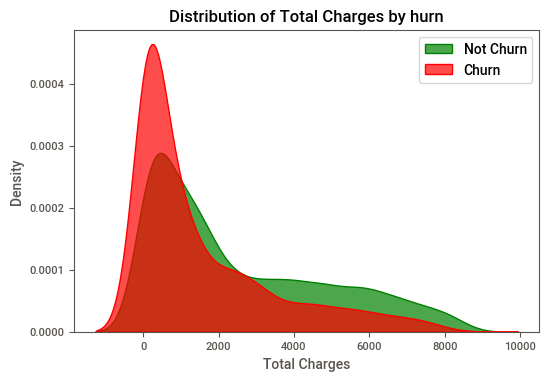

In [72]:
ttc = sns.kdeplot(df.totalcharges[(df["churn"] == 0) ],color= 'Green', shade = True, alpha=0.7)
ttc = sns.kdeplot(df.totalcharges[(df["churn"] == 1) ],color= 'Red', shade = True, alpha=0.7)
ttc.legend(["Not Churn","Churn"])
ttc.set_ylabel('Density')
ttc.set_xlabel('Total Charges')
ttc.set_title('Distribution of Total Charges by hurn')

***Insight:*** *When total charges are low, churn is high, sounds surprising. But there is a reason to it.*

Text(0.5, 1.0, 'Distribution of Tenure by Churn')

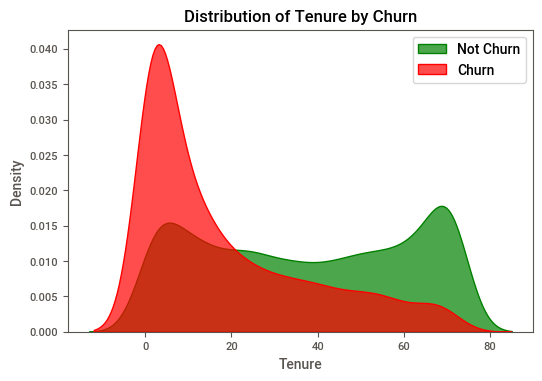

In [73]:
ten = sns.kdeplot(df.tenure[(df["churn"] == 0) ],color= 'Green', shade = True, alpha=0.7)
ten = sns.kdeplot(df.tenure[(df["churn"] == 1) ],color= 'Red', shade = True, alpha=0.7)
ten.legend(["Not Churn","Churn"])
ten.set_ylabel('Density')
ten.set_xlabel('Tenure')
ten.set_title('Distribution of Tenure by Churn')

***Insight:*** *When we combine insights from tenure, monthly charge, and total charge the situation becomes clear.  High monthly charges are linked to high churn, resulting in shorter tenure and low total charges.*
***Customers with high monthly charges are at a higher risk of churn, so the company should target such high-risk customers with a retention campaign.***

***Analysis of categorical data wrt to Churn***

In [74]:
fig = px.histogram(df, x="churn", color="contract", barmode="group", barnorm='percent', text_auto= True, title='Customer Contract Distribution')
fig.show()

In [75]:
# Will show customer distribution for all categorical features
for c in categorical:
    fig = px.histogram(df, x="churn", color=c, barmode="group", barnorm='percent', text_auto= True, title=f'Customer {c.upper()} Distribution')
    fig.show()

**<span style="color:Black;font-family:Georgian; font-size:20px;">1.4 FEATURE IMPORTANCE</span>**

* Risk Ratio
* Correlation
* Mutual Information

1. DIFFERENCE
* (GROUP - GLOBAL) > 0   -->   MORE LIKELY TO CHURN
* (GROUP - GLOBAL) < 0   -->   LESS LIKELY TO CHURN
2. RISK RATIO
* (GROUP / GLOBAL) > 1   -->   MORE LIKELY TO CHURN
* (GROUP / GLOBAL) < 1   -->   LESS LIKELY TO CHURN

<span style='color:Green'>Difference and Risk Ratio are very similar, telling us the same information but in a different way.</span>

In [76]:
global_churn_mean = df.churn.mean()
print(f'The global churn is {global_churn_mean}')

The global churn is 0.2653698707936959


In [77]:
for col in categorical:
    print(col)
    df_cat_group = df.groupby(col).churn.agg(['mean', 'count'])
    df_cat_group['difference'] = df_cat_group['mean'] - global_churn_mean
    df_cat_group['risk_ratio'] = df_cat_group['mean'] / global_churn_mean
    display(df_cat_group)

gender


,mean,count,difference,risk_ratio
gender,,,,
female,0.269209,3488,0.003839,1.014466
male,0.261603,3555,-0.003766,0.985807


seniorcitizen


,mean,count,difference,risk_ratio
seniorcitizen,,,,
no,0.236062,5901,-0.029308,0.889557
yes,0.416813,1142,0.151443,1.570686


partner


,mean,count,difference,risk_ratio
partner,,,,
no,0.329580,3641,0.064210,1.241964
yes,0.196649,3402,-0.068721,0.741038


dependents


,mean,count,difference,risk_ratio
dependents,,,,
no,0.312791,4933,0.047422,1.178700
yes,0.154502,2110,-0.110868,0.582215


phoneservice


,mean,count,difference,risk_ratio
phoneservice,,,,
no,0.249267,682,-0.016103,0.939319
yes,0.267096,6361,0.001726,1.006506


multiplelines


,mean,count,difference,risk_ratio
multiplelines,,,,
no,0.250442,3390,-0.014927,0.943749
no_phone_service,0.249267,682,-0.016103,0.939319
yes,0.286099,2971,0.020729,1.078114


internetservice


,mean,count,difference,risk_ratio
internetservice,,,,
dsl,0.189591,2421,-0.075779,0.714441
fiber_optic,0.418928,3096,0.153558,1.578656
no,0.074050,1526,-0.191320,0.279044


onlinesecurity


,mean,count,difference,risk_ratio
onlinesecurity,,,,
no,0.417667,3498,0.152297,1.573906
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.146112,2019,-0.119258,0.550597


onlinebackup


,mean,count,difference,risk_ratio
onlinebackup,,,,
no,0.399288,3088,0.133918,1.504645
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.215315,2429,-0.050055,0.811377


deviceprotection


,mean,count,difference,risk_ratio
deviceprotection,,,,
no,0.391276,3095,0.125906,1.474456
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.225021,2422,-0.040349,0.847951


techsupport


,mean,count,difference,risk_ratio
techsupport,,,,
no,0.416355,3473,0.150985,1.568960
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.151663,2044,-0.113706,0.571517


streamingtv


,mean,count,difference,risk_ratio
streamingtv,,,,
no,0.335231,2810,0.069861,1.263261
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.300702,2707,0.035332,1.133143


streamingmovies


,mean,count,difference,risk_ratio
streamingmovies,,,,
no,0.336804,2785,0.071434,1.269188
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.299414,2732,0.034044,1.128291


contract


,mean,count,difference,risk_ratio
contract,,,,
month-to-month,0.427097,3875,0.161727,1.609440
one_year,0.112695,1473,-0.152675,0.424672
two_year,0.028319,1695,-0.237051,0.106714


paperlessbilling


,mean,count,difference,risk_ratio
paperlessbilling,,,,
no,0.163301,2872,-0.102069,0.615371
yes,0.335651,4171,0.070281,1.264842


paymentmethod


,mean,count,difference,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,-0.098271,0.629681
credit_card_(automatic),0.152431,1522,-0.112939,0.574410
electronic_check,0.452854,2365,0.187484,1.706502
mailed_check,0.191067,1612,-0.074303,0.720003


tenuregroup


,mean,count,difference,risk_ratio
tenuregroup,,,,
13_24,0.287109,1024,0.021740,1.081922
1_12,0.474382,2186,0.209013,1.787627
25_36,0.216346,832,-0.049024,0.815263
37_48,0.190289,762,-0.075081,0.717070
49_60,0.144231,832,-0.121139,0.543508
61_72,0.066098,1407,-0.199272,0.249079


***Correlation*** of all features with Churn

In [78]:
df_encode.loc[:, df_encode.columns != 'churn'].corrwith(df_encode.churn).sort_values(ascending=False)

monthlycharges      0.193356
paperlessbilling    0.191825
seniorcitizen       0.150889
internetservice     0.047291
multiplelines       0.036310
phoneservice        0.011942
gender             -0.008612
partner            -0.150448
dependents         -0.164221
totalcharges       -0.198324
streamingtv        -0.205742
streamingmovies    -0.207256
paymentmethod      -0.262818
deviceprotection   -0.281465
onlinebackup       -0.291449
techsupport        -0.329852
onlinesecurity     -0.332819
tenuregroup        -0.338818
tenure             -0.352229
contract           -0.396713
dtype: float64

<AxesSubplot:>

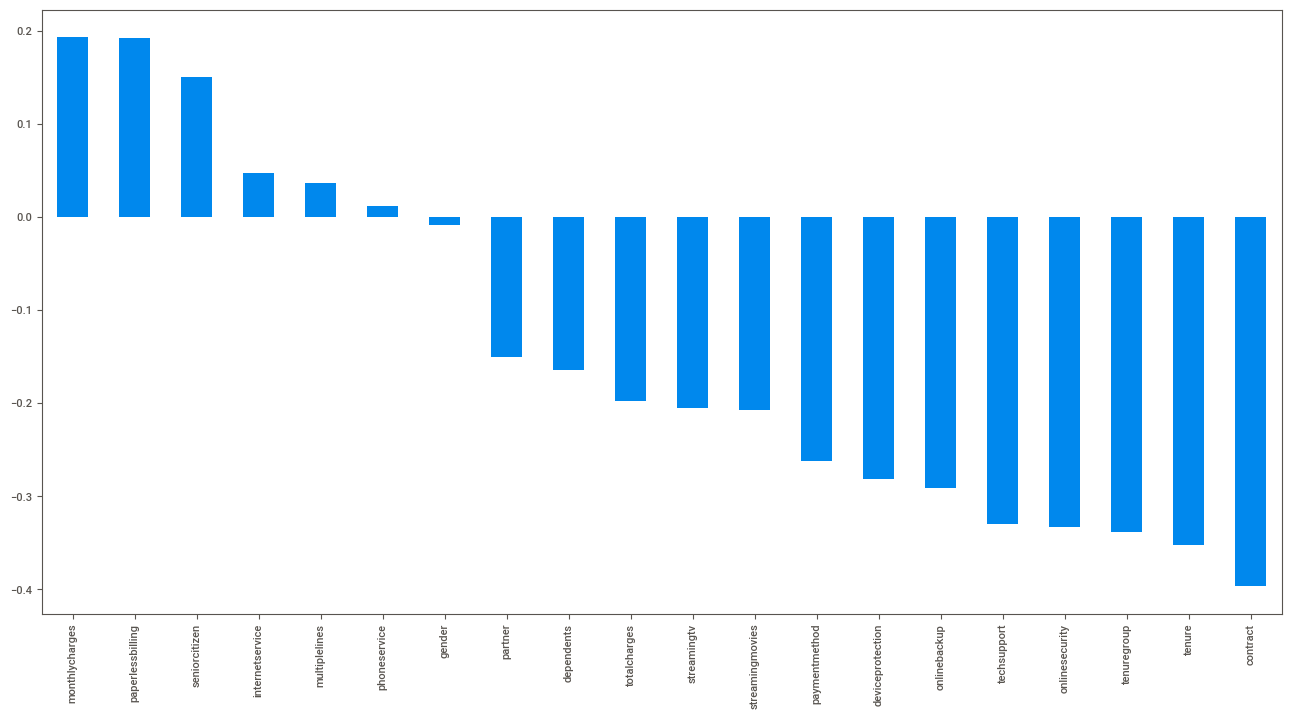

In [79]:
plt.figure(figsize=(16,8))
df_encode.loc[:, df_encode.columns != 'churn'].corrwith(df_encode.churn).sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

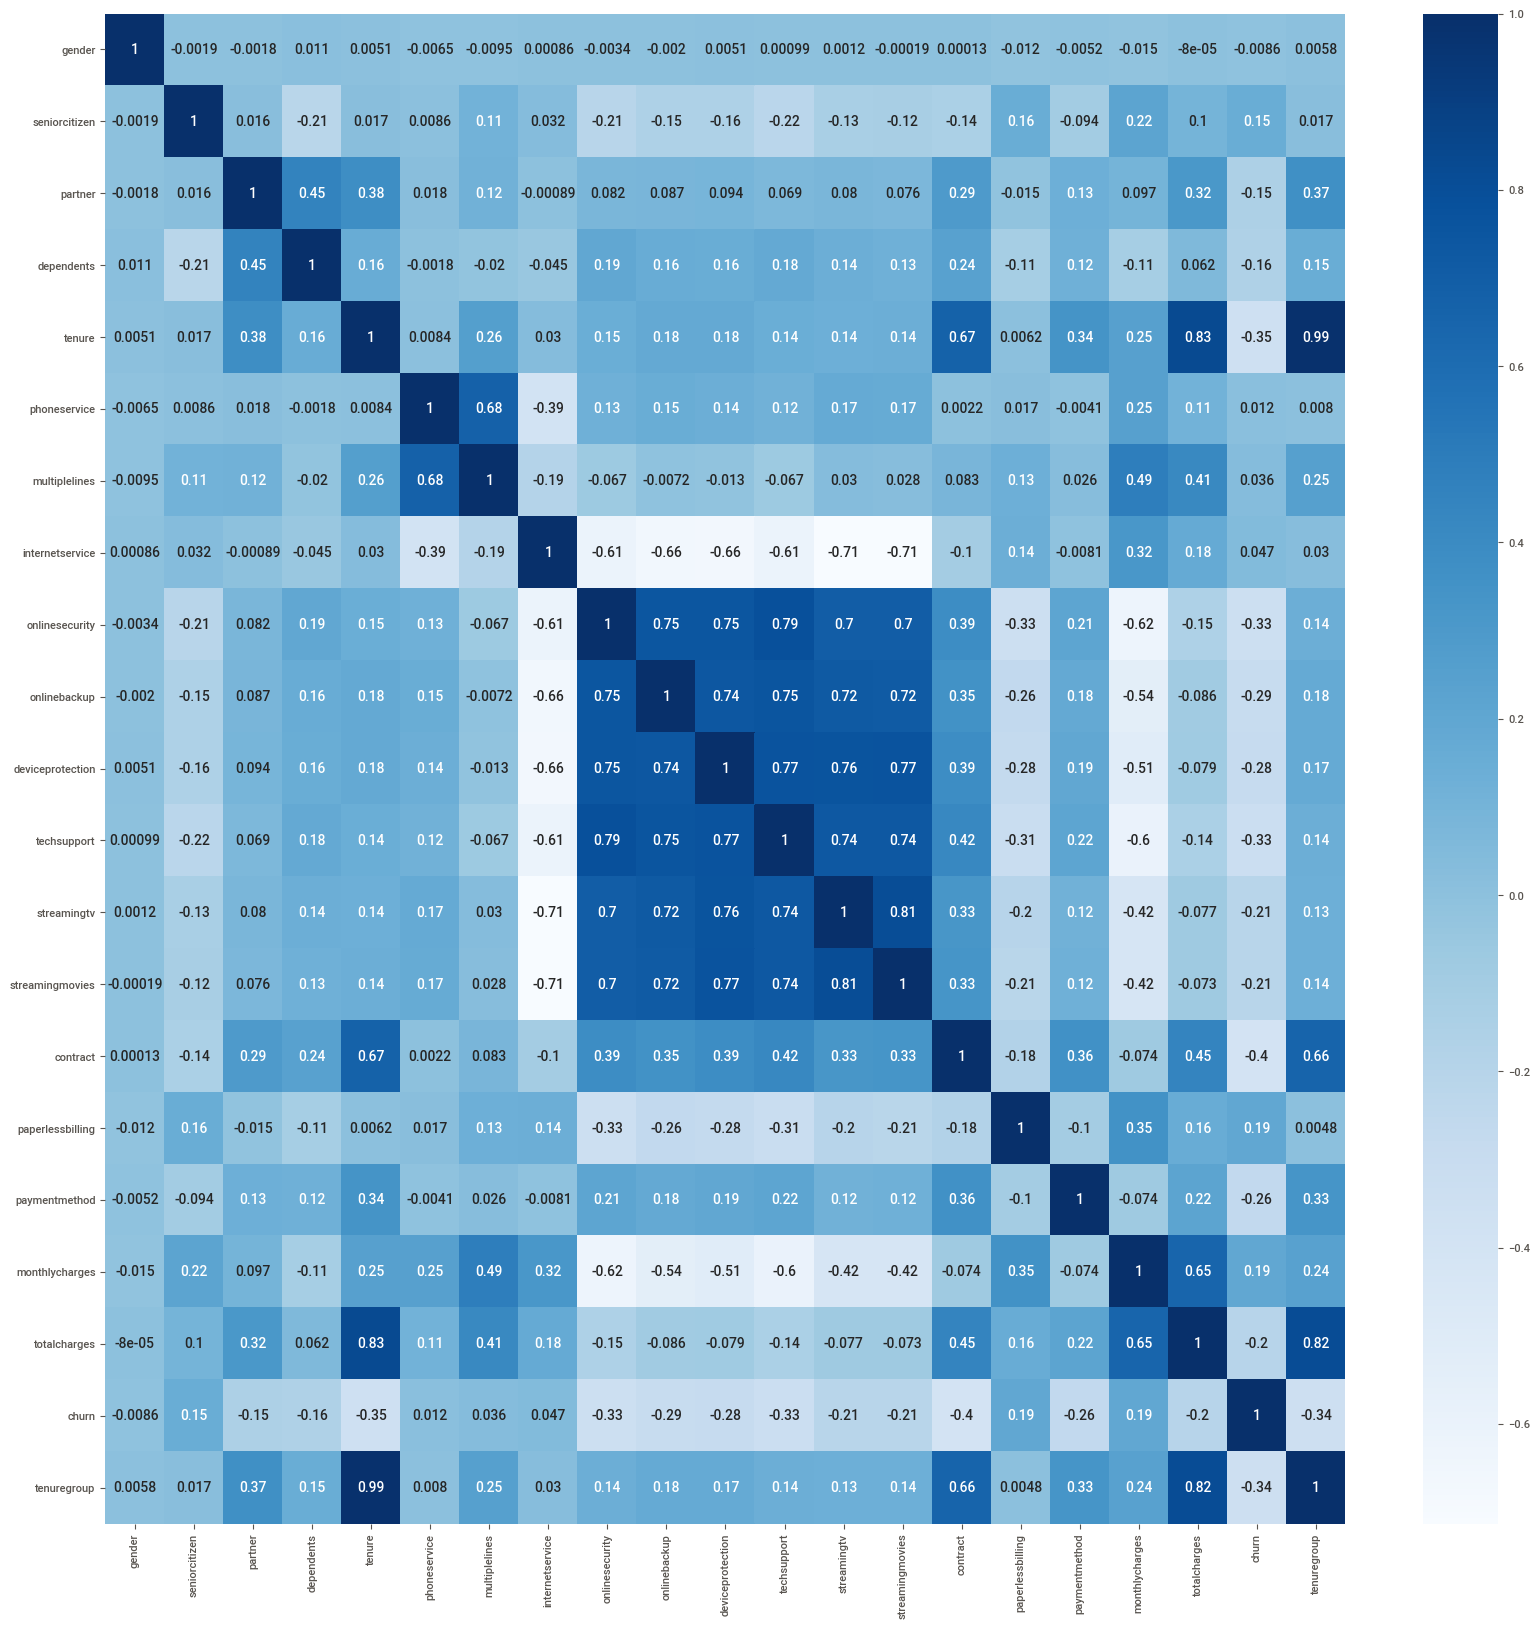

In [80]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_encode.corr(), cmap="Blues", annot=True)

With the help of this we can remove correlate features and decrease the possibility of overfitting. 

***Mutual Information***
* Measures the amount of information we can learn about one variable from the value of another.
* It is equal to zero when two random variables are independent, while higher values indicate greater dependency.

In [81]:
def mutual_info_churn(series):
    return mutual_info_score(series, df_encode.churn)

In [82]:
mi = df_encode[categorical].apply(mutual_info_churn)

In [83]:
mi.sort_values(ascending=False)

contract            0.098453
tenuregroup         0.064987
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
seniorcitizen       0.010577
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

<AxesSubplot:>

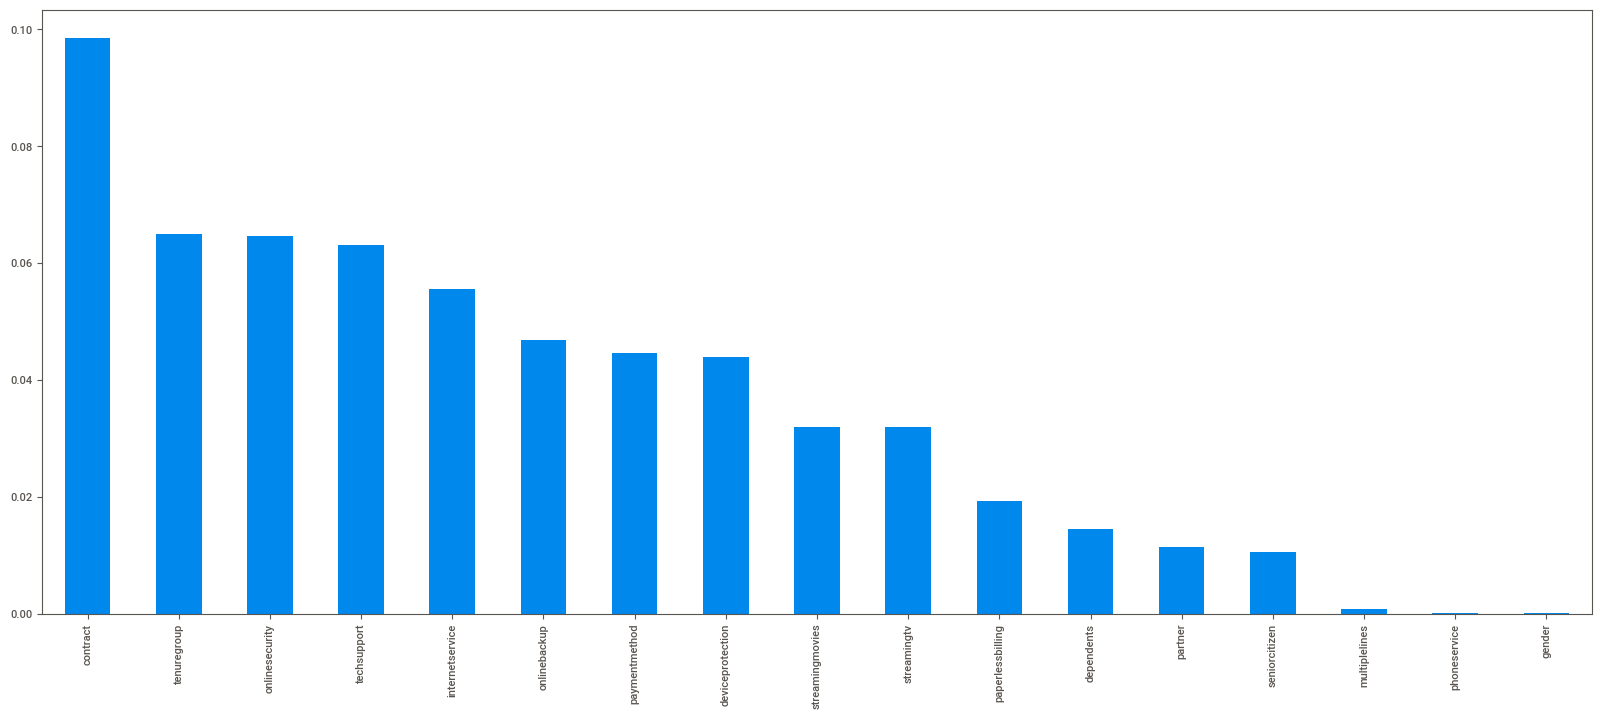

In [84]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

***Insight***
* Factors like contract, tenure group, montly charges have a high imapact on churn and gender, phone service and multiple lines have no impact on churn.

**<span style="color:Black;font-family:Georgian; font-size:20px;">1.5 DATA PREPARATION FOR MODEL TRAINING AND AUTOMATIC EDA</span>**

In [85]:
y = df_encode['churn'].values
X = df_encode.drop(columns = ['churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [86]:
profile = pp.ProfileReport(df)
profile.to_file("pandas_profiling.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 91.18it/s]


In [89]:
report = sv.analyze([df,'Train'], target_feat='churn')
report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [88]:
report_comp = sv.compare([X_train,'Train'],[X_test,'Test'])
report_comp.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:03 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**<span style="color:Black;font-family:Georgian; font-size:20px;">1.6 DATA LIMITATION</span>**

* Imbalance dataset: The target variable churn has lower number of churn customers, so using the original distribution of two classes leads to imbalance dataset which impacts the ability of our model to learn and model may get biased towards the high majority class. 
* Features: Having more features can make ML model inefficient, however some more features related to customer account, services  and loacation can contibute to better model prediction. 

***<center> <span style="color:Black;font-family:Georgian; font-size:22px;">THANK YOU</span> </center>***